1. Import necessary libraries and modules

In [31]:
import pandas as pd
import numpy as np
import urllib.request
import zipfile
import os
import glob
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt



2. Download data, syys

In [32]:
check_files = glob.glob("data/drug_consumption.data")
if check_files:
    print("You already have data")
else:
    print("Wait, data downloading...")
    dir_path = "./data"
    data_filename = "data/dataset_hard.zip"
    data_url = "https://archive.ics.uci.edu/static/public/373/drug+consumption+quantified.zip" 

    os.makedirs(dir_path, exist_ok=True)
    urllib.request.urlretrieve(data_url, data_filename)

    with zipfile.ZipFile(data_filename, 'r') as zip:
        zip.extractall(dir_path)
    print("DONE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")


You already have data


3. Creating pandas dataframe and numpy array )

In [ ]:
file_path = "data/drug_consumption.data"

repl = ['Alcohol','Amphetamines', 'Amyl_nitrite', 'Benzos', 'Caffeine', 'Cannabis', 'Chocolate', 'Cocaine', 'Crack',
        'Ecstasy', 'Heroin', 'Ketamine', 'Legal_highs', 'LSD', 'Methadone', 'Mushrooms','Nicotine', 'Semeron', 'VSA']

#DF-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
def DataFrame():
    headers = [
        'ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity',
        'Nscore', 'EScore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive',
        'Sensation', 'Alcohol','Amphetamines', 'Amyl_nitrite', 'Benzos', 'Caffeine', 'Cannabis', 'Chocolate', 'Cocaine', 'Crack',
        'Ecstasy', 'Heroin', 'Ketamine', 'Legal_highs', 'LSD', 'Methadone', 'Mushrooms','Nicotine', 'Semeron', 'VSA' 
        ]
    
    df = pd.read_csv(file_path, names=headers, index_col= 'ID', na_values='null')

    # df["Age"] = df["Age"].replace({ -0.95197:18, -0.07854:25, 0.49788:35, 1.09449:45, 1.82213:55, 2.59171:65 })
    # df["Gender"] = df["Gender"].replace({ 0.48246:'female', -0.48246:'male' })
    # df["Education"] = df["Education"].replace({ 
    #     -2.43591 :'Left School Before 16 years', -1.73790 :'Left School at 16 years', 
    #     -1.43719 : 'Left School at 17 years' , -1.22751 : 'Left School at 18 years',
    #     -0.61113 : 'Some College,No Certificate Or Degree', -0.05921 : 'Professional Certificate/ Diploma',
    #     0.45468 : 'University Degree', 1.16365 : 'Masters Degree', 1.98437 : 'Doctorate Degree'
    #     })
    # df["Country"] = df["Country"].replace({ 
    #     -0.09765 : 'Australia', 0.24923 : 'Canada', -0.46841 : 'New Zealand',
    #     0.21128 : 'Republic of Ireland', 0.96082 : 'UK', -0.57009 : 'USA', -0.28519 : 'Other'
    #     })
    # df["Ethnicity"] = df["Ethnicity"].replace({ 
    #     -0.50212 : 'Asian', -1.10702 : 'Black', 1.90725 : 'Mixed-Black/Asian',
    #     0.12600 : 'Mixed-White/Asian', -0.22166 : 'Mixed-White/Black', 0.11440 : 'Other', -0.31685 : 'White'
    #     })
    df = df.replace({ 'CL0' : 0, 'CL1' : 1, 'CL2' : 2, 'CL3' : 3, 'CL4' : 4, 'CL5' : 5, 'CL6' : 6, })

    return df

#Arr-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
def NpArray():
    headers = [
        'ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity',
        'Nscore', 'EScore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive',
        'Sensation', 'Alcohol','Amphetamines', 'Amyl_nitrite', 'Benzos', 'Caffeine', 'Cannabis', 'Chocolate', 'Cocaine', 'Crack',
        'Ecstasy', 'Heroin', 'Ketamine', 'Legal_highs', 'LSD', 'Methadone', 'Mushrooms','Nicotine', 'Semeron', 'VSA' 
        ]
    arr = np.genfromtxt(file_path, delimiter=',', names=headers, dtype = None, encoding="utf-8", missing_values='null')
    return arr


<span style="font-size: 24px;"><b>TASKS</b></span>

1. Поборотися із зниклими даними.

In [ ]:
#DF-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
from sklearn.ensemble import RandomForestClassifier
def task_1_g(df):
    clf = RandomForestClassifier()
    miss_df = df[df['Education'].isnull()==True]
    exist_df = df[df['Education'].isnull()==False]
    y = exist_df['Education']
    exist_df.drop('Education', axis = 1, inplace = True)
    clf.fit(exist_df, y)
    miss_df.drop('Education', axis = 1, inplace = True)
    pred = clf.predict(miss_df)
    miss_df.loc[:, 'Education'] = pred
    taska_1 = miss_df
    return taska_1

df = DataFrame()
df_w = task_1_g(df)



In [35]:
#DF-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
def task_1_df(df):
    clear = df.dropna()
    return clear

#Arr-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
def task_1_arr(arr):
    clear = arr[~np.isnan(arr['Education'])]
    return clear




2. Пронормувати вибраний датасет або стандартизувати його

In [ ]:
#DF-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
def task_2_df(header):
    hed = (header - header.min()) / (header.max() - header.min())
    return hed
df1 = DataFrame()
df = task_1_df(df1)
norm=df.copy()
headers_1 = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity',
        'Nscore', 'EScore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive']
for header in headers_1:
    norm[header] = task_2_df(df[header])

norm

In [37]:
#Arr-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
def task_2_arr(arr, field):
    col = arr[field]
    norm_col = (col - np.min(col)) / (np.max(col) - np.min(col))
    arr[field] = norm_col
    return arr

arr1 = NpArray()
arr = task_1_arr(arr1)

arr_norm = arr.copy()

headers_2 = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity',
                        'Nscore', 'EScore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive']

for field in headers_2:
    arr_norm = task_2_arr(arr_norm, field)

print(arr_norm)


[(   1, 0.40913683, 1., 0.53768087, 1.        , 0.4090609 , 0.5605621 , 0.41211633, 0.43568983, 0.36765377, 0.53444425, 0.4284743 , -1.18084, 'CL5', 'CL2', 'CL0', 'CL2', 'CL6', 'CL0', 'CL5', 'CL0', 'CL0', 'CL0', 'CL0', 'CL0', 'CL0', 'CL0', 'CL0', 'CL0', 'CL2', 'CL0', 'CL0')
 (   2, 0.24647542, 0., 1.        , 1.        , 0.26214307, 0.41347434, 0.7961059 , 0.76256651, 0.60982692, 0.51340473, 0.33792023, -0.21575, 'CL5', 'CL2', 'CL2', 'CL0', 'CL6', 'CL4', 'CL6', 'CL3', 'CL0', 'CL4', 'CL0', 'CL2', 'CL0', 'CL2', 'CL3', 'CL0', 'CL4', 'CL0', 'CL0')
 (   3, 0.40913683, 0., 0.53768087, 1.        , 0.26214307, 0.44478792, 0.62297606, 0.39293892, 0.26606069, 0.37866495, 0.21540083,  0.40148, 'CL6', 'CL0', 'CL0', 'CL0', 'CL6', 'CL3', 'CL4', 'CL0', 'CL0', 'CL0', 'CL0', 'CL0', 'CL0', 'CL0', 'CL0', 'CL1', 'CL0', 'CL0', 'CL0')
 ...
 (1886, 0.24647542, 1., 0.65393821, 0.        , 0.26214307, 0.68224579, 0.28979544, 0.32359923, 0.24425291, 0.32139517, 0.56534264, -0.52593, 'CL4', 'CL6', 'CL5', 'CL5', 

3. Збудувати гістограму по одному із атрибутів, що буде показувати на кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.

C:\Users\olany\AppData\Local\Temp\ipykernel_13680\3319753248.py:32: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({ 'CL0' : 0, 'CL1' : 1, 'CL2' : 2, 'CL3' : 3, 'CL4' : 4, 'CL5' : 5, 'CL6' : 6, })


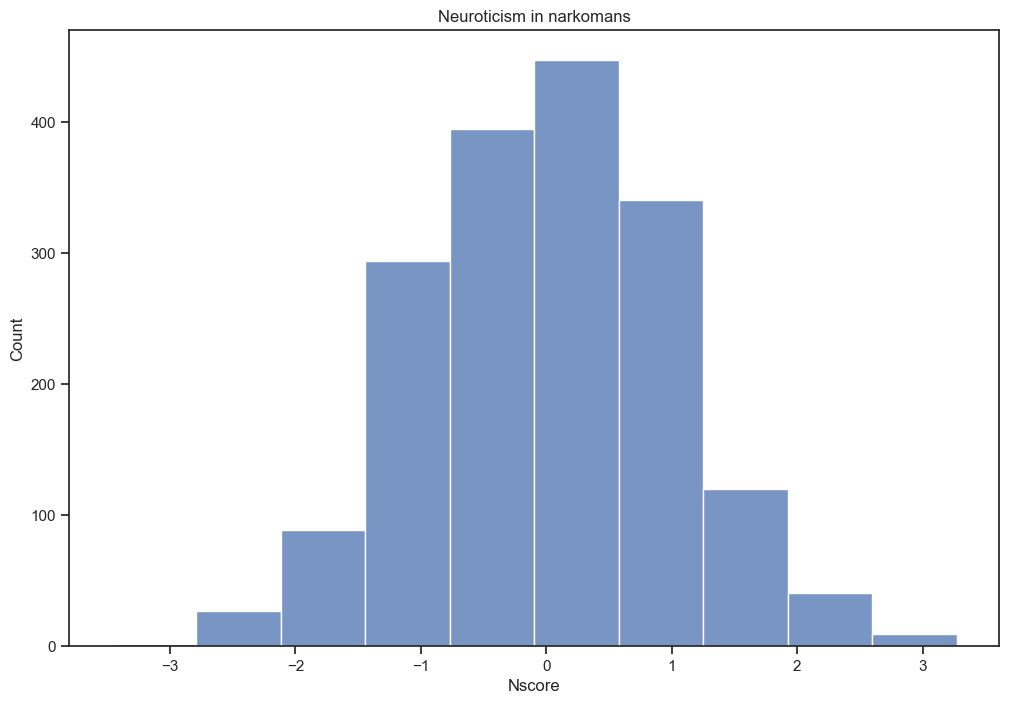

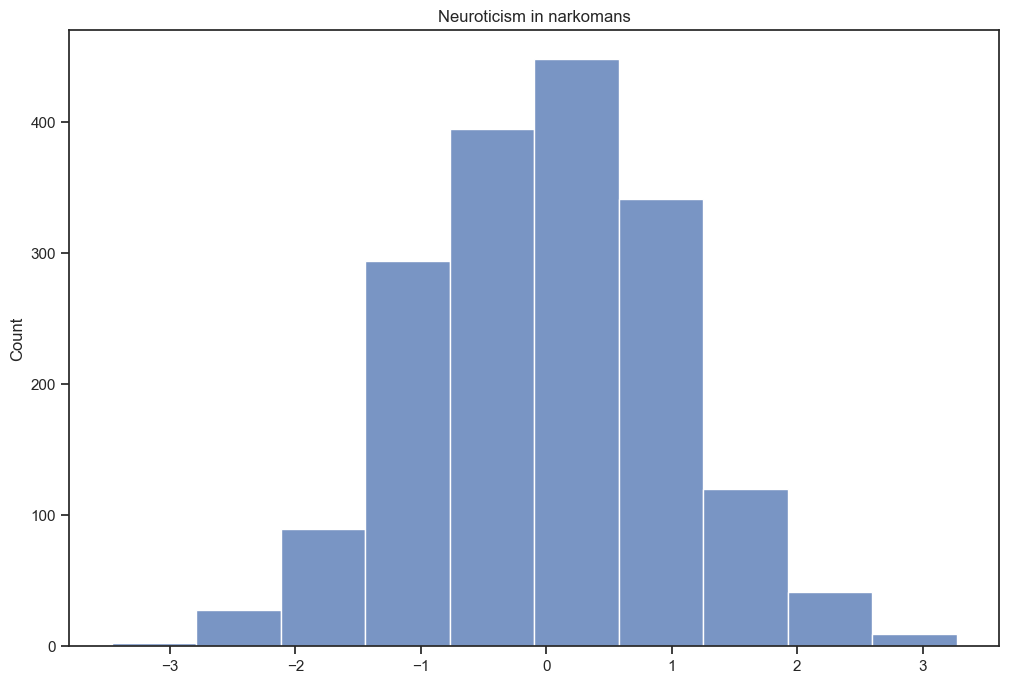

In [61]:
#DF-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
def task_3_df(df):
    plt.figure(figsize=(12,8))
    sns.histplot(df, x = 'Nscore', bins=10)
    plt.title('Neuroticism in narkomans')
df1 = DataFrame()
df = task_1_df(df1)
task_3_df(df)
#Arr-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
def task_3_arr(arr):
    plt.figure(figsize=(12,8))
    sns.histplot(arr['Nscore'], bins=10)
    plt.title('Neuroticism in narkomans')

arr1 = NpArray()
arr = task_1_arr(arr1)
task_3_arr(arr) 



#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

4. Збудувати графік залежності одного integer/real атрибута від іншого.

C:\Users\olany\AppData\Local\Temp\ipykernel_13680\3319753248.py:32: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({ 'CL0' : 0, 'CL1' : 1, 'CL2' : 2, 'CL3' : 3, 'CL4' : 4, 'CL5' : 5, 'CL6' : 6, })
C:\Users\olany\AppData\Local\Temp\ipykernel_13680\1838556679.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Gender"] = df["Gender"].replace({ 0.48246:'female', -0.48246:'male' })


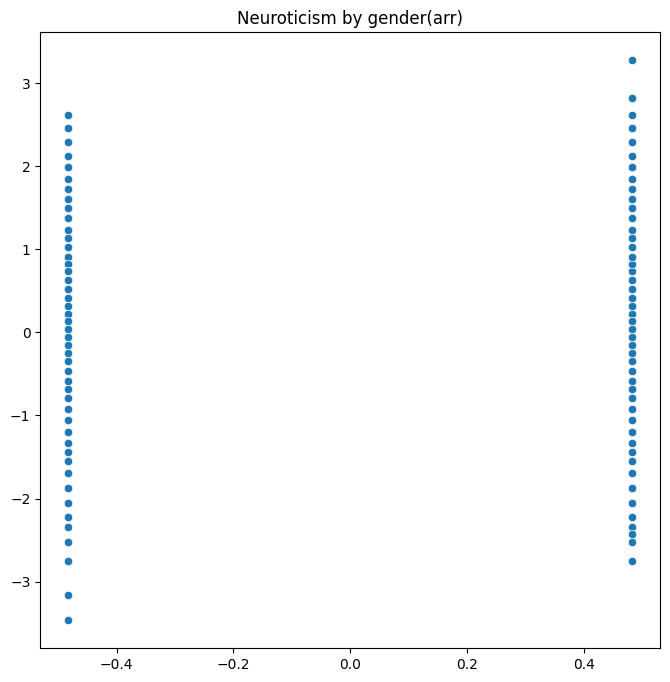

In [ ]:
#DF-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
df1 = DataFrame()
df = task_1_arr(df1)
df["Gender"] = df["Gender"].replace({ 0.48246:'female', -0.48246:'male' })

def task_4_df(df):
    plt.figure(figsize=(8,8))
    sns.scatterplot(df, x = 'Gender', y = 'Nscore')
    plt.title('Neuroticism by gender(df)')

#Arr-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
def task_4_arr(arr):
    plt.figure(figsize=(8,8))
    sns.scatterplot(df, x = arr['Gender'], y = arr['Nscore'])
    plt.title('Neuroticism by gender(arr)')

arr1 = NpArray()
arr = task_1_arr(arr1)
task_4_arr(arr)

5. Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real атрибутів.

In [ ]:
from scipy.stats import pearsonr, spearmanr
#DF-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
def task_5_df(df):
    pirson = df['Nscore'].corr(df['Cscore'], method='pearson')
    sperman = df['Nscore'].corr(df['Cscore'], method='spearman')

    return pirson, sperman

# df1 = DataFrame()
# df = task_1_df(df1)
# pir, sper = task_5_df(df)
# print(f"pirson: {pir}, spir: {sper}")

#Arr-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
def task_5_arr(arr):
    pirson, p  = pearsonr(arr['Nscore'], arr['Cscore'])
    sperman, s = spearmanr(arr['Nscore'], arr['Cscore'])

    return pirson, sperman

# arr1 = NpArray()
# arr = task_1_arr(arr1)
# pir, sper = task_5_arr(arr)
# print(f"pirson: {pir}, spir: {sper}")

pirson: -0.3904478244791164, spir: -0.3745770236403458


6. Провести One Hot Encoding категоріального string атрибуту.

In [60]:

def task_6_df(df):
    df_encode = pd.get_dummies(df['Country'])
    for col in df_encode.columns:
        df_encode[col] = df_encode[col].astype(int)
    df = df.join(df_encode)
    df = df.drop(columns='Country')

    return df

# df["Country"] = df["Country"].replace({ 
#         -0.09765 : 'Australia', 0.24923 : 'Canada', -0.46841 : 'New Zealand',
#         0.21128 : 'Republic of Ireland', 0.96082 : 'UK', -0.57009 : 'USA', -0.28519 : 'Other'
#         })

from numpy.lib import recfunctions as rfn

def task_6_arr(arr):
    alc = np.unique(arr['Alcohol'])
    one_hot = {g: (arr['Alcohol'] == g).astype(int) for g in alc}
    result = np.empty(len(arr), dtype=[(g, int) for g in alc])
    for g in alc:
        result[g] = one_hot[g]
    return rfn.merge_arrays((arr, result), flatten=True)

arr = NpArray()
print(task_6_arr(arr))






[(   1,  0.49788,  0.48246, -0.05921,  0.96082,  0.126  ,  0.31287, -0.57545, -0.58331, -0.91699, -0.00665, -0.21712, -1.18084, 'CL5', 'CL2', 'CL0', 'CL2', 'CL6', 'CL0', 'CL5', 'CL0', 'CL0', 'CL0', 'CL0', 'CL0', 'CL0', 'CL0', 'CL0', 'CL0', 'CL2', 'CL0', 'CL0', 0, 0, 0, 0, 0, 1, 0)
 (   2, -0.07854, -0.48246,  1.98437,  0.96082, -0.31685, -0.67825,  1.93886,  1.43533,  0.76096, -0.14277, -0.71126, -0.21575, 'CL5', 'CL2', 'CL2', 'CL0', 'CL6', 'CL4', 'CL6', 'CL3', 'CL0', 'CL4', 'CL0', 'CL2', 'CL0', 'CL2', 'CL3', 'CL0', 'CL4', 'CL0', 'CL0', 0, 0, 0, 0, 0, 1, 0)
 (   3,  0.49788, -0.48246, -0.05921,  0.96082, -0.31685, -0.46725,  0.80523, -0.84732, -1.6209 , -1.0145 , -1.37983,  0.40148, 'CL6', 'CL0', 'CL0', 'CL0', 'CL6', 'CL3', 'CL4', 'CL0', 'CL0', 'CL0', 'CL0', 'CL0', 'CL0', 'CL0', 'CL0', 'CL1', 'CL0', 'CL0', 'CL0', 0, 0, 0, 0, 0, 0, 1)
 ...
 (1886, -0.07854,  0.48246,  0.45468, -0.57009, -0.31685,  1.13281, -1.37639, -1.27553, -1.772  , -1.38502,  0.52975, -0.52593, 'CL4', 'CL6', 'CL5', 

7. Провести візуалізацію багатовимірних даних

C:\Users\olany\AppData\Local\Temp\ipykernel_13680\3319753248.py:32: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({ 'CL0' : 0, 'CL1' : 1, 'CL2' : 2, 'CL3' : 3, 'CL4' : 4, 'CL5' : 5, 'CL6' : 6, })


<Figure size 1200x800 with 0 Axes>

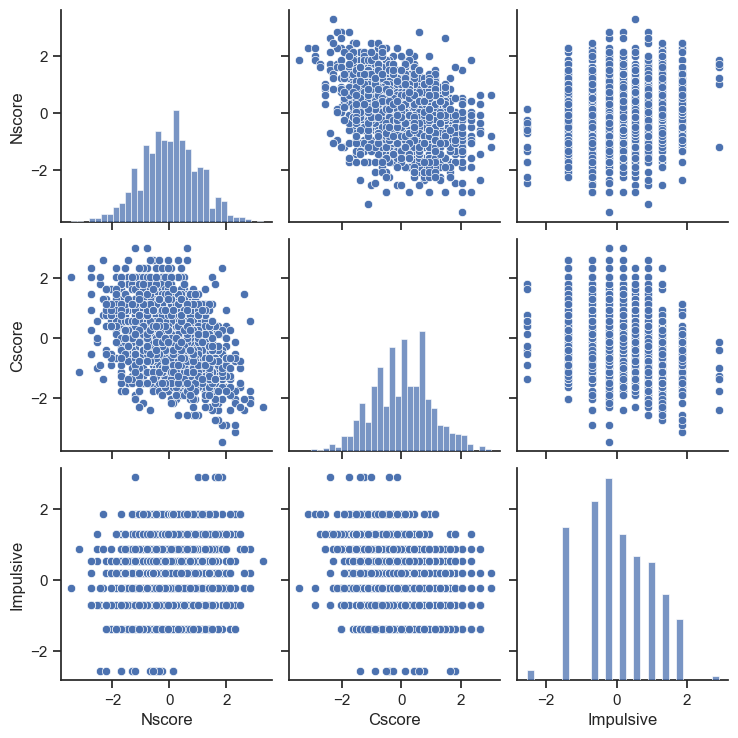

In [58]:
def task_7(df):
    sns.set_theme(style="ticks")
    plt.figure(figsize=(12, 8))
    sns.pairplot(df[[ 'Nscore', 'Cscore', 'Impulsive']])

df1 = DataFrame()
df = task_1_df(df1)
task_7(df)
